<img src="descriptiva.png" width="300" height="440"> 

# 📘 Módulo 2: Regresión Lineal Simple

## 🎯 Objetivo de aprendizaje
Al finalizar este módulo, el estudiante será capaz de:
- Comprender el concepto de regresión lineal simple.
- Estimar los parámetros del modelo lineal (pendiente e intercepto).
- Evaluar la calidad del ajuste mediante el coeficiente de determinación $R^2$.
- Realizar predicciones a partir de un modelo ajustado.
- Aplicar la regresión lineal simple en un contexto logístico.


## 🧠 2.1 Concepto teórico

La **regresión lineal simple** busca modelar la relación entre dos variables:
- Una **variable dependiente $y$** → lo que se quiere predecir.
- Una **variable independiente $x$** → el factor explicativo.

El modelo tiene la forma:

$  y = \beta_0 + \beta_1 x+ \varepsilon $


donde:
-  $\beta_0$ : intercepto (valor de $y$ cuando $x=0$).
-  $\beta_1$ : pendiente (cambio promedio en $y$ por cada unidad de cambio en $x$).
-  $\varepsilon$ : error aleatorio o residuo.

El modelo se ajusta buscando minimizar la **suma de los cuadrados de los errores (SCE)** entre los valores observados y los estimados.

## 📊 2.2 Dataset

Supongamos que una empresa de transporte quiere estudiar la relación entre la **distancia de entrega (km)** y el **tiempo total de entrega (minutos)**.

A continuación se presenta un conjunto de datos **real**, para práctica.


In [14]:
import pandas as pd

# Crear dataset ficticio ampliado (20 observaciones)
data = {
    'Distancia_km': [3, 5, 8, 10, 12, 14, 16, 18, 20, 22,
                     25, 28, 30, 33, 36, 40, 45, 48, 52, 55],
    'Tiempo_entrega_min': [15, 18, 22, 25, 28, 31, 34, 36, 39, 42,
                           45, 48, 50, 54, 57, 61, 66, 70, 74, 78]
}

df = pd.DataFrame(data)
df

,Distancia_km,Tiempo_entrega_min
0,3,15
1,5,18
2,8,22
3,10,25
4,12,28
5,14,31
6,16,34
7,18,36
8,20,39
9,22,42


## 📈 2.3 Visualización de la relación

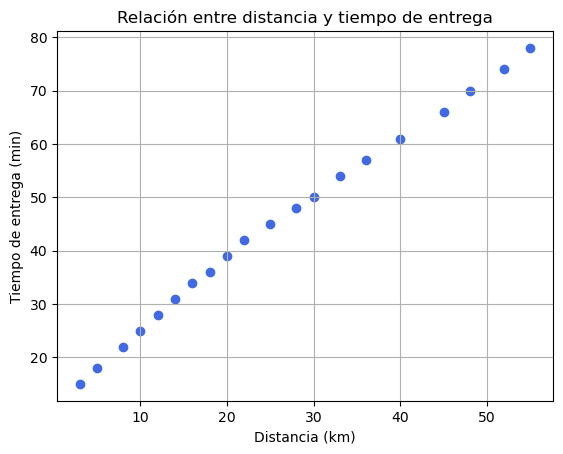

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df['Distancia_km'], df['Tiempo_entrega_min'], color='royalblue')
plt.title("Relación entre distancia y tiempo de entrega")
plt.xlabel("Distancia (km)")
plt.ylabel("Tiempo de entrega (min)")
plt.grid(True)
plt.show()

## 🧮 2.4 Ajuste del modelo de regresión lineal

In [27]:
from sklearn.linear_model import LinearRegression

# Variable independiente (X) y dependiente (y)
X = df[['Distancia_km']]
y = df['Tiempo_entrega_min']

# Crear y ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Parámetros del modelo
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
r2 = modelo.score(X, y)

print(f"Intercepto (β0): {intercepto:.2f}")
print(f"Pendiente (β1): {pendiente:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}")

Intercepto (β0): 13.88
Pendiente (β1): 1.18
Coeficiente de determinación (R²): 0.996


## 🔍 2.5 Ecuación del modelo
El modelo tiene la forma:


$\hat{y} = \beta_0 + \beta_1 x$


Por ejemplo, si los resultados son similares a:


$\hat{y} = 12.8 + 1.18x$


Interpretación:
- Cada kilómetro adicional de distancia aumenta el tiempo de entrega en promedio **1.18 minutos**.
- Cuando la distancia es 0, el tiempo base (preparación, carga, etc.) es de aproximadamente **12.8 minutos**.


## 📊 2.6 Visualización del modelo ajustado

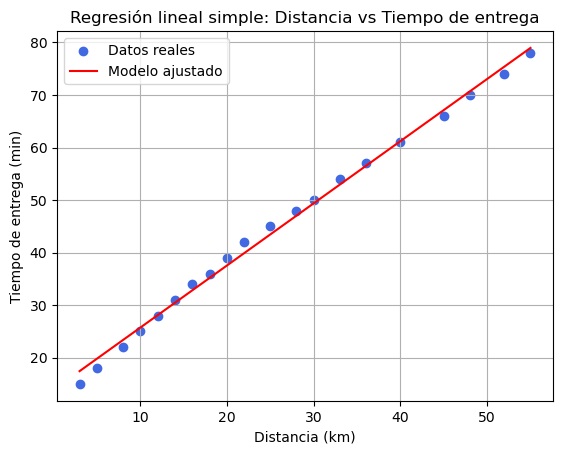

In [31]:
# Predicciones
y_pred = modelo.predict(X)

# Graficar datos y línea de regresión
plt.scatter(X, y, color='royalblue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Modelo ajustado')
plt.title("Regresión lineal simple: Distancia vs Tiempo de entrega")
plt.xlabel("Distancia (km)")
plt.ylabel("Tiempo de entrega (min)")
plt.legend()
plt.grid(True)
plt.show()


## 📈 2.7 Predicción de nuevos valores

In [34]:
# Predecir tiempo de entrega para nuevas distancias
nuevas_distancias = pd.DataFrame({'Distancia_km': [12, 27, 50, 60]})
predicciones = modelo.predict(nuevas_distancias)

# Mostrar resultados
pd.concat([nuevas_distancias, pd.Series(predicciones, name='Pred_Tiempo_min')], axis=1)

,Distancia_km,Pred_Tiempo_min
0,12,28.084009
1,27,45.833285
2,50,73.048842
3,60,84.881692


## 📏 2.8 Intervalos de confianza y pruebas de hipótesis (visión conceptual)

Aunque `sklearn` no calcula automáticamente los intervalos de confianza, se pueden obtener con `statsmodels`.

### Hipótesis a contrastar:

$H_0: \beta_1 = 0 \quad \text{(no existe relación lineal)}$ 

$H_1: \beta_1 \neq 0 \quad \text{(existe relación lineal significativa)}$


Un valor-p menor que 0.05 indica evidencia suficiente para rechazar  $H_0$ .

In [47]:
import statsmodels.api as sm

X2 = sm.add_constant(X)  # Agregar intercepto
modelo_sm = sm.OLS(y, X2).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Tiempo_entrega_min   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4040.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.24e-22
Time:                        17:18:53   Log-Likelihood:                -32.486
No. Observations:                  20   AIC:                             68.97
Df Residuals:                      18   BIC:                             70.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.8846      0.564     24.618   

# 🧩 2.9 Interpretación práctica en contexto logístico

El modelo permite:
- **Predecir tiempos de entrega** para rutas de distinta distancia.
- **Evaluar eficiencia** de las operaciones (si las entregas reales difieren mucho del modelo, puede haber retrasos operativos).
- **Planificar recursos** (vehículos o conductores) según la distancia promedio de los pedidos.

---

## 🧠 2.10 Ejercicios propuestos

1. Construye un modelo lineal que relacione el **peso de carga (kg)** con el **consumo de combustible (L)** en una flotilla.
2. Genera tu propio dataset con al menos 20 observaciones, representando una relación logística real (por ejemplo, distancia–costo, peso–tiempo, o demanda–inventario).
3. Calcula el $ R^2 $ y comenta si el modelo ajusta bien.
4. Obtén la ecuación del modelo y predice para tres nuevos valores de $ x $.
5. Explica qué utilidad tendría este modelo en la planificación logística de rutas o tiempos de entrega.
